In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### O Metódo de Euler Explicito ou Forward Euler

#### Expansão em Taylor de uma função y


Expansão em Série de Taylor de $y(t)$ centrada em $t_0$ é dada por
$$
y(t) = \sum_{n=0}^{\infty} \frac{y^{(n)}(t_0)}{n!}(t-t_0)^n
$$
##### Expansão de y até a primeira derivada
Seja $h = t_n - t_{n-1}$
$$
y(t_{k+1}) = y(t_k) + y'(t_k)h + \mathcal{O}(h^2)\\
$$
O metódo de Euler explicito é um método recursivo de solução de equações diferenciais ordinárias, e consiste em utilizar a aproximação por Taylor e ignorar o erro $\mathcal{O}(h^2)$, nos dando: <br>
$$
y_{n+1} \approx u_{n+1} = u_n + f(u_n,t_n) \cdot (t_{n+1} - t_n)
$$
Com $y_n = y(t_n)$ a solução analitica no ponto $t_n$ e $u_n$ a aproximação númerica, $f(a,b)$ a derivada de $a$ em $b$

In [6]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def f_euler(F, y0, ts, p = 0):
    ys = [y0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ys[-1],tnext,p)*h
        ys.append(ynext)
        t = tnext
    return np.array(ys)

### O metódo de Runge-Kutta de segunda ordem
Enquanto o metódo de Euler aproxima a solução em um ponto andando na tangente daquele ponto, o metódo de Runge-Kutta de segunda ordem aproxima o mesmo ponto andando na média entre a tangente no ponto e a tangente no ponto futuro.<br>
Seja
$$
k_1 = f(u_n,t_n)\\
k_2 = f(u_n + hk_1,t_{n+1})
$$
Então $k_1$ é a derivada no ponto e $k_2$ é a derivada no ponto futuro, aproximando a mesma pelo metódo de Euler<br>
O passo para Runge-Kutta será então a média entre estas duas, e ficará:
$$
y_{n+1} \approx u_{n+1} = u_n + h \frac{k_1 + k_2}{2}
$$

In [7]:
def rk_2(F, y0, ts, p = 0):
    ys = [y0]
    t = ts[0]
    h = ts[1] - ts[0]
    for tnext in ts:
        k1 = F(ys[-1], t, p)
        k2 = F(ys[-1] + h*k1,tnext, p)
        ynext = ys[-1] + h * (k1+k2) / 2.0
        ys.append(ynext)
        t = tnext
    return np.array(ys[:-1])

Testando para a EDO 
$$ \begin{cases} y'(t) = - y(t) + 2\sin(t^2) \\ y(0) = 1.2\end{cases} $$

In [8]:
def F(y,t,p = 0):
    return -y + 2*np.sin(t**2)

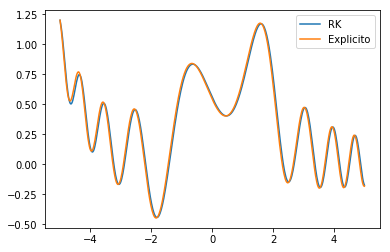

In [9]:
## Definindo o dominio
ts = np.linspace(-5,5,500)
y0 = 1.2
## Criando a lista para Runge-Kutta 2nd order
ys = rk_2(F,y0,ts)

## Criando a lista para Euler Explicito
ys2 = f_euler(F,y0,ts)

#ans = f(y,ts)

plt.plot(ts,ys,label='RK')
plt.plot(ts,ys2,label='Explicito')
plt.legend()
plt.show()

### O metódo de Euler converge - Um pouco de Análise

### Definições:
Seja $\frac{\mathrm{d}y}{\mathrm{d}t} = f(y,t)$<br>
Seja $t \in \mathbb{N}$ o número de 'tempos' no dominio e $t^*$ o tempo final e $\lfloor \cdot \rfloor$ a função `floor`, que retorna a parte inteira.<br>
Seja $h \in \mathbb{R}, h > 0$, o 'tamanho' de cada partição, ou seja $h = t_{n+1} - t_n$ <br>
Podemos então definir $n$, tal que $n$ assume valores no conjunto $\{0, \dots , \lfloor \frac{t^*}{h} \rfloor\}$<br>
Seja $\lVert \cdot \rVert$ uma norma definida no espaço

Seja $y_n$ o valor real (analitico) da função **$y$** no ponto $t_n$, ou seja $y_n = y(t_n)$<br>
Seja $u_n$ o valor númerico aproximado da função $y$ no ponto $t_n$ pelo método de Euler, ou seja $u_{n+1} = u_{n} + f(u_{n},t_{n})\cdot h$<br>
Uma função $f$ é dita Lipschitz se satisfaz a condição de Lipschitz: $\exists M \in \mathbb{R}; \lVert f(x_1) - f(x_2) \rVert \leq M\cdot\lVert x_1 - x_2\rVert$ 

Um metódo é dito convergente se:
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert u_n - y_n \rVert = 0
$$

Ou seja, sempre que a malha for refinida, a solução númerica em um ponto se aproxima da solução analitica neste ponto

### Teorema: O metódo de Euler converge

#### Prova

Tomemos $f(y,t)$ analitica, ou seja, pode ser representada pela série de Taylor centrada em um ponto $t_0$ e é Lipschitz.<br>
$f(y,t)$ analitica implica $y$ analitica.<br>
Vamos definir $err_n = u_n - y_n$, nosso erro númerico, então queremos provar
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert err_n \rVert = 0
$$
Expandindo nossa solução $y$ da equação diferencial por Taylor:
$$
y_{n+1} = y_n + hf(y_n,t_n)+\mathcal{O}(h^2) \tag{1}
$$
Como $y$ é analitica, então sua derivada é contínua, logo pelo `Teorema do Valor Extremo`, dado uma vizinhança em torno de $t_n$ o termo $\mathcal{O}(h^2)$ é limitado $\forall h>0$ e $n \leq \lfloor t^*/h \rfloor$ por $M>0, M \in \mathbb{R}$, e pela propriedade arquimediana do corpo do reais $\exists c \in \mathbb{R}, c>0; c\cdot h^2 \geq M$, portanto podemos limitar $\mathcal{O}(h^2)$ por $ch^2, c>0$.<br>
Agora vamos fazer $err_{n+1} = u_{n+1} - y_{n+1}$ usando a expansão em Taylor $y_{n+1}$ e Euler em $u_{n+1}$
$$
\begin{align}
err_{n+1} &= u_{n+1} - y_{n+1}\\
&= u_n + h(f(u_n,t_n)) - y_n - h(f(yn,tn) + \mathcal{O}(h^2)\\
&= \underbrace{u_n - y_n}_{err_n} + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
&= err_n + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
\end{align}
$$
Daqui podemos perceber que o erro no passo seguinte depende também do erro anterior já cometido<br>
E segue do fato de que $\mathcal{O}(h^2)$ é limitada, com uma cota superior $ch^2$ e da desigualdade triangular
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert
$$
E pela condição de Lipschitz
$$
\lVert f(u_n,t_n) - f(y_n,t_n) \rVert \leq \lambda\lVert u_n - y_n \rVert = \lambda\lVert err_n \rVert, \lambda > 0
$$
Então temos
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq \lVert err_n\rVert + \lambda h\lVert err_n \rVert + ch^2\\$$
$\therefore$
$$
\lVert err_{n+1} \rVert \leq  (1+h\lambda)\lVert err_n \rVert + ch^2 \tag{2}
$$

---
Agora vamos propor:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1]
$$
#### Demonstração: Indução em n
Para $n = 0$
$$
\lVert err_0 \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^0 - 1] = \frac{c}{\lambda}h[1 - 1] = 0\\
err_0 = u_0 - y_0 = 0, \text{pois é a condição inicial}
$$
Temos portanto nossa hipotese de indução, vale para $n=k$, vamos para o passo indutivo: $n = k+1$. Da equação 2, temos:
$$
\lVert err_{k+1}\rVert \leq (1+h\lambda)\lVert err_k \rVert + ch^2
$$
E pela hipotese de indução
$$
\lVert err_k \rVert\leq \frac{c}{\lambda}h[(1+h\lambda)^k - 1]
$$
Logo
$$
\lVert err_{k+1} \rVert \leq (1+h\lambda)\frac{c}{\lambda}h[(1+h\lambda)^k - 1] + ch^2
$$
Desenvolvendo o termo da direita:
$$
\begin{align}
(1+h\lambda)\frac{c}{\lambda}h[(1+h\lambda)^k - 1] + ch^2 &= \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - (1+h\lambda)] +ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h(1+h\lambda) +ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h - \frac{c}{\lambda}h^2\lambda + ch^2\\
&= \frac{c}{\lambda}h(1+h\lambda)^{k+1} - \frac{c}{\lambda}h\\
&= \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - 1]
\end{align}
$$
Portanto
$$
\lVert err_{k+1} \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^{k+1} - 1]
$$
E o passo indutivo vale. Logo pelo principio de indução finita temos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1] \tag{3}
$$

---
Como $h\lambda >0$, então temos $(1+h\lambda) < e^{h\lambda}$ e portanto $(1+h\lambda)^n < e^{nh\lambda}$, e n assume valor máximo em $n = \lfloor t^*/h \rfloor $, portanto:
$$(1+h\lambda)^n < e^{\lfloor t^*/h \rfloor h\lambda} \leq e^{t^*\lambda}$$
Substituindo na inequação 3 para $err_n$, teremos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1]
$$
Passando o limite $h\to 0$, teremos:
$$
\lim_{h\to 0}\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1] = 0\\
\therefore
\lim_{h\to 0}\lVert err_n \rVert = 0
$$
Portanto o Metódo de Euler converge para toda função Lipschitz. Q.E.D.


### Visualizando o teorema

Vamos plotar a solução da equação diferencial $y' = sin(t^2) - y$ com um refinamento da malha cada vez melhor e visualizar a convergência do metódo<br>
Plotaremos também um gráfico com a evolução do erro relativo entre a solução de malha mais fina e todas as soluções anteriores

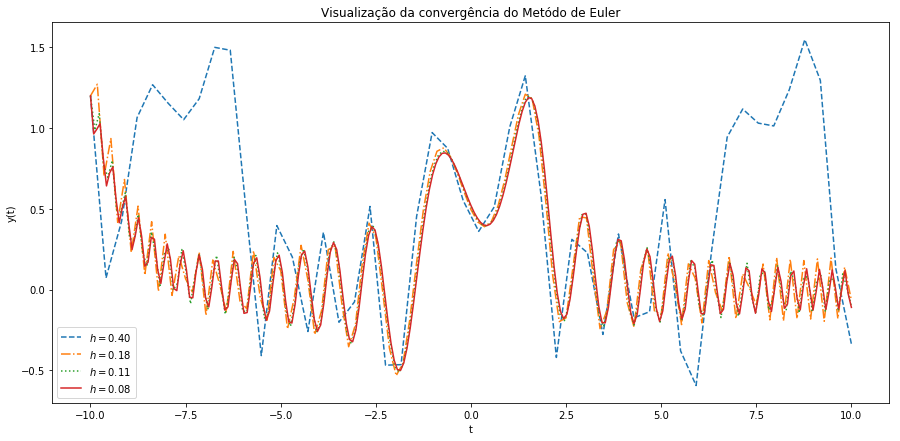

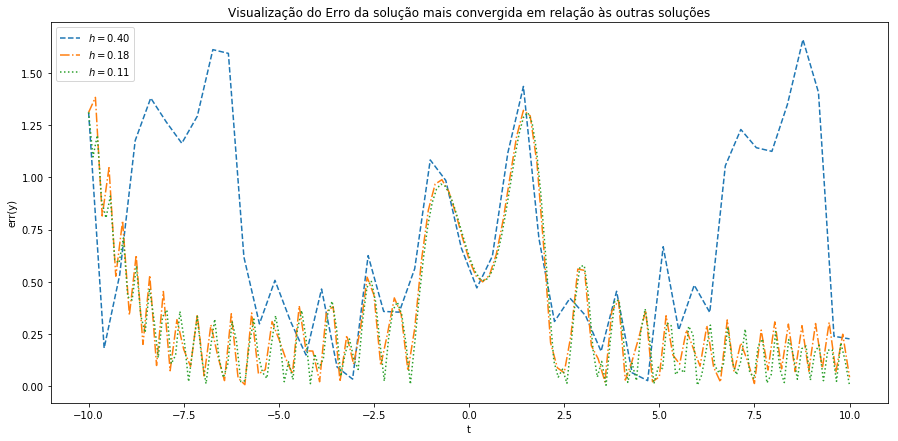

In [10]:
## Equação Diferencial
def F(y,t,p=0):
    return -y + 2*np.sin(t**2) 

# Criação dos dominios com vários h diferentes
ts = np.array([np.linspace(-10,10,i) for i in np.arange(50,300,63)])

# Condição inicial
y0 = 1.2
# Preparação da listas para plotagem
ys_e = np.array([f_euler(F,y0,i) for i in ts ])
# Estilo das curvas
lstyle = ['--','-.',':','-']

# Plot do gráfico de solução
plt.figure(figsize=(15,7))
for i in range(len(ts)):
    plt.plot(ts[i],ys_e[i], ls = lstyle[i], label='$h = '+ str("{0:.2f}".format(20.0/len(ts[i])) +'$'))
plt.title('Visualização da convergência do Metódo de Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Criando os arrays de erro
hs = [0.4,0.18,0.11]
ans = [[],[],[]]
for i in range(len(ys_e[:-1])):
    n = np.floor(hs[i]/0.08)
    for j in range(len(ys_e[i])):
        try: ans[i].append(ys_e[-1][n*j])
        except: ans[i].append(ys_e[-1][-1])
for i in range(len(ans)): 
    ans[i] = np.array(ans[i])
            
err = np.array([abs(j - i) for i,j in zip(ys_e,ans)])
plt.figure(figsize=(15,7))
for i in range(len(ts)-1):
    plt.plot(ts[i],err[i], ls = lstyle[i], label='$h = '+ str("{0:.2f}".format(20.0/len(ts[i])) +'$'))
plt.title('Visualização do Erro da solução mais convergida em relação às outras soluções')
plt.xlabel('t')
plt.ylabel('err(y)')
plt.legend()
plt.show()

### Gráficos de Convergência de Runge-Kutta

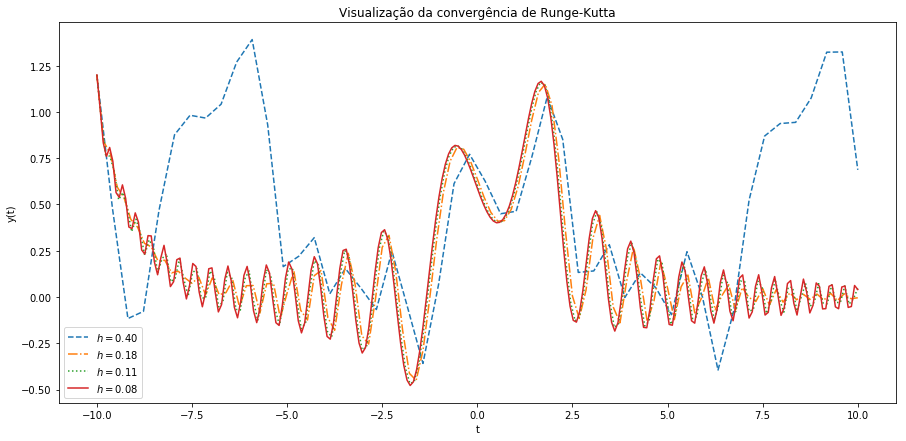

In [11]:
# Preparação da listas para plotagem
ys_rk = np.array([rk_2(F,y0,i) for i in ts ])
# Estilo das curvas
lstyle = ['--','-.',':','-']

# Plot do gráfico de solução
plt.figure(figsize=(15,7))
for i in range(len(ts)):
    plt.plot(ts[i],ys_rk[i], ls = lstyle[i], label='$h = '+ str("{0:.2f}".format(20.0/len(ts[i])) +'$'))
plt.title('Visualização da convergência de Runge-Kutta')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

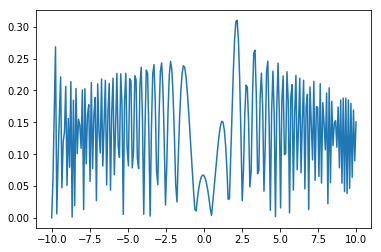

In [12]:
plt.plot(ts[-1],abs(ys_e[-1]-ys_rk[-1]))

##### Teorema: O metódo de Euler converge

###### Prova

Tomemos $f(y,t)$ analitica, ou seja, pode ser representada pela série de Taylor centrada em um ponto $t_0$ e é Lipschitz continua.<br>
$f(y,t)$ analitica implica $y$ analitica.<br>
Vamos definir $err_n = u_n - y_n$, nosso erro númerico, então queremos provar
$$
\lim_{h\to 0^+} \max_{n=0, \dots , \lfloor \frac{t^*}{h} \rfloor} \lVert err_n \rVert = 0
$$
Expandindo nossa solução $y$ da equação diferencial por Taylor:
$$
y_{n+1} = y_n + hf(y_n,t_n)+\mathcal{O}(h^2)
$$
Como $y$ é analitica, então sua derivada é contínua, logo pelo `Teorema do Valor Extremo`, dado uma vizinhança em torno de $t_n$ o termo $\mathcal{O}(h^2)$ é limitado $\forall h>0$ e $n \leq \lfloor t^*/h \rfloor$ por $M>0, M \in \mathbb{R}$, e pela propriedade arquimediana do corpo do reais $\exists c \in \mathbb{R}, c>0; c\cdot h^2 \geq M$, portanto podemos limitar $\mathcal{O}(h^2)$ por $ch^2, c>0$.<br>
Agora vamos fazer $err_{n+1} = u_{n+1} - y_{n+1}$ usando a expansão em Taylor e Euler em $u_n$
$$
\begin{align}
err_{n+1} &= u_{n+1} - y_{n+1}\\
&= u_n + h(f(u_n,t_n)) - y_n - h(f(yn,tn) + \mathcal{O}(h^2)\\
&= \underbrace{u_n - y_n}_{err_n} + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
&= err_n + h\left(f(u_n,t_n) - f(y_n,t_n)\right) + \mathcal{O}(h^2)\\
\end{align}
$$
Daqui podemos perceber que o erro no passo seguinte depende também do erro anterior já cometido<br>
E segue do limite superior para $\mathcal{O}(h^2)$ e da desigualdade triangular
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert
$$
E pela condição de Lipschitz
$$
\lVert f(u_n,t_n) - f(y_n,t_n) \rVert \leq \lambda\lVert u_n - y_n \rVert = \lambda\lVert err_n \rVert, \lambda > 0
$$
Então temos
$$
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq \lVert err_n\rVert + \lambda h\lVert err_n \rVert + ch^2\\
\therefore
\lVert err_{n+1} \rVert \leq \lVert err_n\rVert + \lVert h\left(f(u_n,t_n) - f(y_n,t_n)\right)\rVert + \lVert ch^2 \rVert \leq  (1+h\lambda)\lVert err_n \rVert + ch^2
$$


Assumiremos (provar mais tarde)
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[(1+h\lambda)^n - 1]
$$
Como $h\lambda >0$, então temos $(1+h\lambda) < e^{h\lambda}$ e portanto $(1+h\lambda)^n < e^{nh\lambda}$, e n assume valor máximo em $n = \lfloor t^*/h \rfloor $, portanto: $(1+h\lambda)^n < e^{\lfloor t^*/h \rfloor h\lambda} = e^{t^*\lambda}$<br>
Substituindo na inequação anterior para $err_n$, teremos:
$$
\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1]
$$
Passando o limite $h\to 0$, teremos:
$$
\lim_{h\to 0}\lVert err_n \rVert \leq \frac{c}{\lambda}h[e^{t^*\lambda} - 1] = 0\\
\therefore
\lim_{h\to 0}\lVert err_n \rVert = 0
$$
O Metódo de Euler converger. Q.E.D.


### O modelo presa-predador de Lotka-Volterra (em construção)

O modelo é dado pelas EDOs

$$
\begin{cases}
\frac{\mathrm{d}x}{\mathrm{d}t} = (\lambda - by)x\\
\frac{\mathrm{d}y}{\mathrm{d}t} = (-\mu + cx)y\\
\end{cases}
$$
Com $\lambda, \mu, b, c$ todos reais positivos e $x$ representando a população de presas e $y$ a população de predadores<br>
Como já visto anteriormente, vamos tratar de forma vetorial este problema, sendo:

$$
v = \begin{bmatrix}
\frac{\mathrm{d}x}{\mathrm{d}t} \\
\frac{\mathrm{d}y}{\mathrm{d}t}
\end{bmatrix}
$$

E sendo $D$ o operador linear de derivada, teremos:

$$
Dv = \begin{bmatrix}
(\lambda - by)x\\
(-\mu + cx)y
\end{bmatrix}
$$

E então podemos encontrar a solução aplicando algum metódo númerico

In [13]:
## Parametros:
## v: vetor dos pontos iniciais
## p[l,b,m,c]: uma lista com os parametros do modelo
### l: lambda
### b: b
### m: mu
### c: c

def model(v,t,p = 0):
    if p == 0: p = [1,1,1,1]
    return np.array([(p[0]-p[1]*v[1])*v[0],(p[3]*v[0]-p[2])*v[1]])

In [14]:
# Parametros de ajusate
ts = np.linspace(0,30,500)
y0 = [2,1]

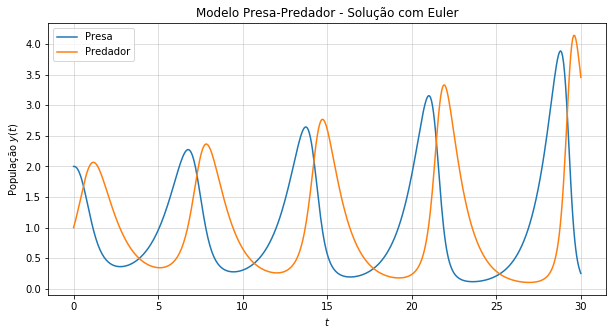

In [15]:
ys_e = f_euler(model,y0,ts)

plt.figure(figsize=(10,5))
plt.plot(ts,ys_e)
plt.title('Modelo Presa-Predador - Solução com Euler')
plt.legend(['Presa', 'Predador'])
plt.xlabel('$t$')
plt.ylabel('População $y(t)$')
plt.grid(alpha = 0.5)
plt.show()

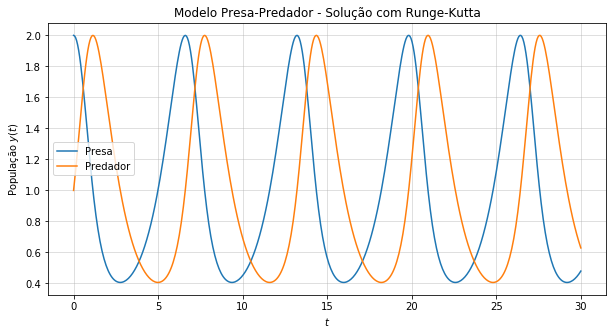

In [16]:
ys_rk = rk_2(model,y0,ts)

plt.figure(figsize=(10,5))
plt.plot(ts,ys_rk)
plt.title('Modelo Presa-Predador - Solução com Runge-Kutta')
plt.legend(['Presa', 'Predador'])
plt.xlabel('$t$')
plt.ylabel('População $y(t)$')
plt.grid(alpha = 0.5)
plt.show()

In [17]:
## F: Função derivada da função que queremos encontrar
## t0: tempo inicial
## y0: ponto inicial
## ts: range de tempo
## p: parametros particulares de cada modelo
def f2_euler(F, y0, ts, p = 0):
    ys = [y0]
    h = ts[1]-ts[0]
    for tnext in ts[1:]:
        ynext = ys[-1] + F(ys[-1],tnext,p)*h
        ys.append(ynext)
        t = tnext
    return np.array(ys)

In [18]:
## Parametros:
## v: vetor dos pontos iniciais
## p[l,b,m,c]: uma lista com os parametros do modelo
### l: lambda
### b: b
### m: mu
### c: c

def model(v,t,p = 0):
    if p == 0: p = [1,1,1,1]
    return np.array([(p[0]-p[1]*v[1])*v[0],(p[3]*v[0]-p[2])*v[1]])

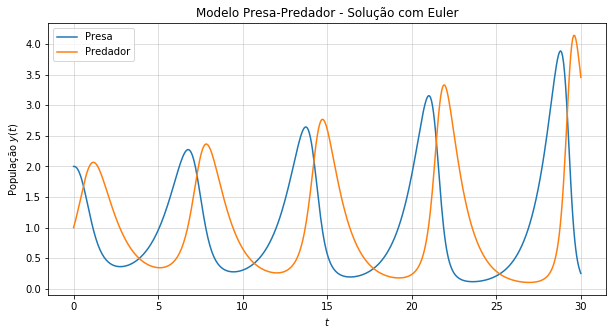

In [19]:
# Parametros de ajusate
ts = np.linspace(0,30,500)
y0 = [2,1]

ys_e = f2_euler(model,y0,ts)

plt.figure(figsize=(10,5))
plt.plot(ts,ys_e)
plt.title('Modelo Presa-Predador - Solução com Euler')
plt.legend(['Presa', 'Predador'])
plt.xlabel('$t$')
plt.ylabel('População $y(t)$')
plt.grid(alpha = 0.5)
plt.show()

In [21]:
def model2(y, t, p = 0):
    return -0.5*y

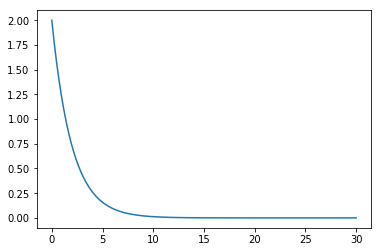

In [24]:
ts = np.linspace(0,30,500)
plt.plot(ts,f2_euler(model2,2,ts))

In [36]:
def EulerFW(F,y0,ts,p=0):
    ys=[y0]
    h=ts[1]-ts[0]
    tc=ts[0]
    for t in ts[1:]:
        yn=ys[-1]+h*F(ys[-1],ts,p)
        ys.append(yn)
        tc=t
    return ys

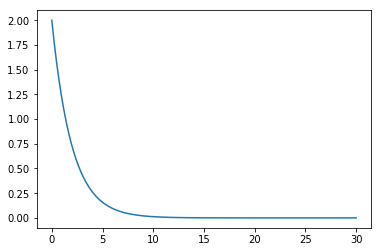

In [37]:
ts = np.linspace(0,30,500)
plt.plot(ts,EulerFW(model2,2,ts))

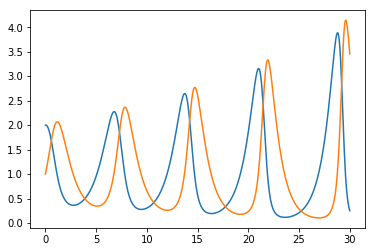

In [40]:
ts = np.linspace(0,30,500)
plt.plot(ts,EulerFW(model,[2,1],ts))

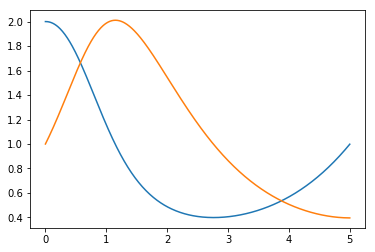

In [99]:
ts = np.linspace(0,5,500)
plt.plot(ts,f2_euler(model,[2,1],ts))

In [100]:
def model3(v,t,p=0):
    if p == 0: p = [1.5,1.2,1,1]
    return np.array([p[0]*np.log(v[1])-p[1]*v[1]+p[2]*np.log(v[0])+p[3]*v[0]])

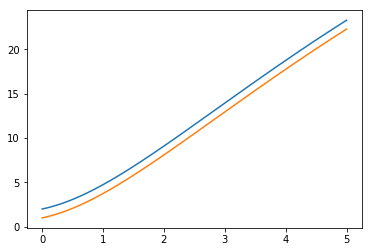

In [101]:
plt.plot(ts,rk_2(model3,[2,1],ts))

In [102]:
model3([2,1],ts)

array([1.49314718])

### Análise qualitativa da EDO

Não temos uma solução analítica do sistema de EDO, mas podemos encontrar uma relação entre as variaveis do problema, olhando para a taxa de variação de cada uma das populações da seguinte forma

\begin{equation}
\dfrac{\mathrm{d}y}{\mathrm{d}x} = \frac{\dfrac{\mathrm{d}y}{\mathrm{d}t}}{\dfrac{\mathrm{d}x}{\mathrm{d}t}} = \dfrac{(-\mu + cx)y}{(\lambda - by)x}
\end{equation}

E esta é uma equação separavel, podemos seguir com a solução:

\begin{equation}
\dfrac{(-\mu + cx)y}{y}\mathrm{d}y = \dfrac{(\lambda - by)x}{x}\mathrm{d}x
\end{equation}

Obtendo então

\begin{equation}
\int \bigg( \dfrac{\lambda - by}{y}\bigg) dy = \int \bigg( \dfrac{-\mu + cx}{x}\bigg) dx
\end{equation}

Resolvendo, temos a solução geral para o modelo:

\begin{equation}
\lambda\ln(|y|) - by = -\mu\ln(|x|) + cx + K
\end{equation}
Como as populações $x,y$ são sempre positivas, podemos reescrever
\begin{equation}
\lambda\ln(y) - by + \mu\ln(x) - cx = K
\end{equation}

Sendo $K \in \mathbb{R}$, constante em relação a cada solução.\\
Temos assim uma relação entre cada parametro e variavel do nosso problema

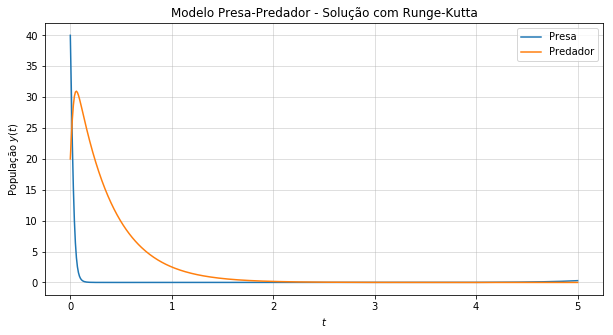

In [103]:
ys_rk = f_euler(model,[40,20],ts,p=[3,1.3,2.7,0.5])

plt.figure(figsize=(10,5))
plt.plot(ts,ys_rk)
plt.title('Modelo Presa-Predador - Solução com Runge-Kutta')
plt.legend(['Presa', 'Predador'])
plt.xlabel('$t$')
plt.ylabel('População $y(t)$')
plt.grid(alpha = 0.5)
plt.show()

In [104]:
## Parametros:
## v: vetor dos pontos iniciais
## p[l,b,m,c]: uma lista com os parametros do modelo
### l: lambda
### b: b
### m: mu
### c: c

def model4(v,t,p = 0):
    if p == 0: p = [3,1.3,2.7,0.5]
    return np.array([(p[0]-p[1]*v[1])*v[0],(p[3]*v[0]-p[2])*v[1]])

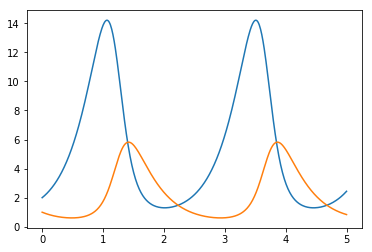

In [105]:
ans = odeint(model4,[2,1],ts)
plt.plot(ts,ans)

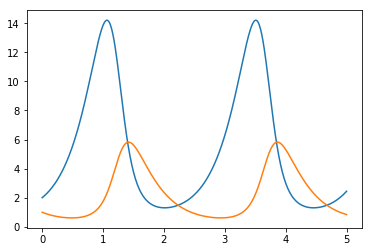

In [106]:
ans2 = rk_2(model4,[2,1],ts)
plt.plot(ts,ans2)